We test develop *neuro_dmt* validations.

In [ ]:
import os
import seaborn
tips = seaborn\
    .load_dataset("tips")
tips.head()

In [ ]:
parameters_plotting = dict(
        x="bing bing",
        #y="total_bill",
        y="jinga jinga",
        hue="smoker",
        #hue=None,
        #col="time", #column
        kind="bar",
        height=8,
        aspect=.7)

In [ ]:
from dmt.tk.plotting import bar
seaborn.catplot(
    data=tips.rename(
        columns={
            "total_bill": "jinga jinga",
            "sex": "bing bing"}),
    **parameters_plotting)

In [ ]:
parameters_plotting = dict(
        hue="sex",
        y="total_bill",
        x="smoker",
        col="time", #column
        kind="bar",
        height=10,
        aspect=.7)
bar.plot(
    tips,
    **parameters_plotting)

## Test develop Adapter behavior

In [1]:
from neuro_dmt.analysis.circuit.composition.by_layer\
    import ByLayerCellDensityAnalysis
from neuro_dmt.models.bluebrain.circuit.mock.adapter\
    import MockCircuitAdapter

In [2]:
blcda = ByLayerCellDensityAnalysis(adapter=MockCircuitAdapter())

In [3]:
sm = blcda._get_statistical_measurement(None)
sm.head()

,cell_density
layer,
1,8511.696490
1,9862.290413
1,10293.154390
1,9193.620990
1,9338.491463


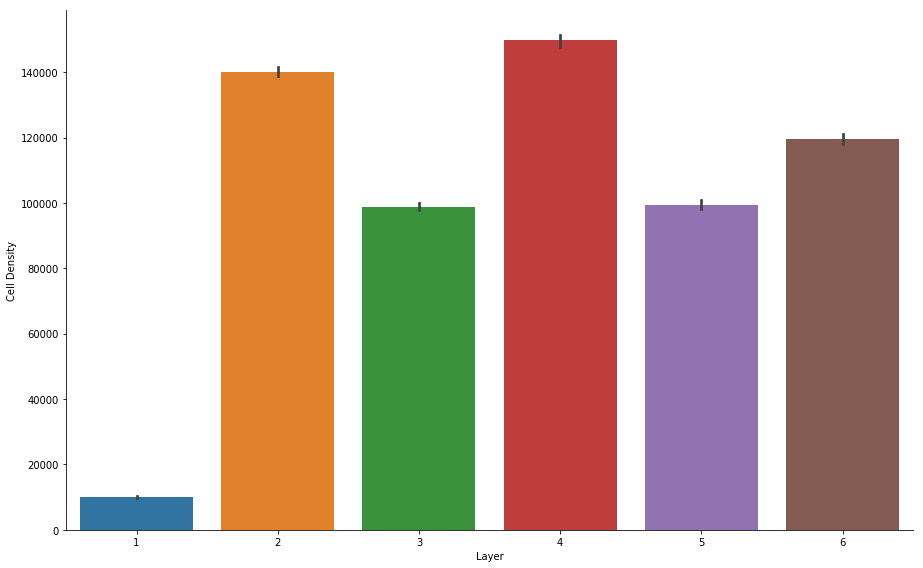

In [4]:
figure = blcda\
    .plotter\
    .get_figure(
        sm.reset_index(),
        caption=blcda.adapter_method.__doc__)

In [5]:
print("figure caption ", figure.caption)
print("analysis method doc", blcda._adapter_method.__doc__)

figure caption  
        Mock cell density.
        
analysis method doc 
        Mock cell density.
        


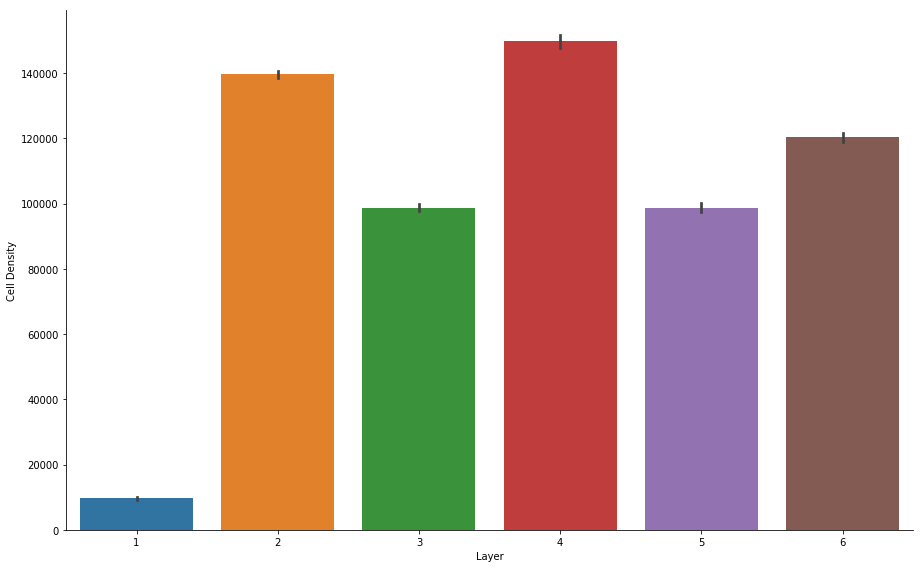

In [6]:
report = blcda.get_report(None)
print(report)

In [7]:
import os
os.path.exists(
    blcda.reporter.get_output_folder())
os.listdir(
    blcda.reporter.get_output_folder())

['report.txt',
 'plotting.ipynb',
 '.ipynb_checkpoints',
 'proto_validations.ipynb',
 'figures']

In [8]:
blcda.reporter.post(report)

'/home/muchu/work/bbp/work/validations/dmt/v2/notebooks'

In [ ]:
from neuro_dmt.models.bluebrain.circuit.mock.adapter\
    import MockCircuitAdapter

In [ ]:
from neuro_dmt.analysis.circuit.composition.interfaces\
    import CellDensityAdapterInterface

In [ ]:
print(CellDensityAdapterInterface.__implementation_guide__)

In [ ]:
from dmt.model import interface, adapter

@interface.implements(CellDensityAdapterInterface)
class BadAdapter:
    pass

In [ ]:
print(CellDensityAdapterInterface.__implementation_guide__)